# Анализ выходных данных

In [24]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display, Markdown

import seaborn as sns
import matplotlib.pyplot as plt
# ------------------------------------------------------
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
from utils.utils import start
start()

SDF_FILE_PATH = "../results/scored_mols.sdf"

Настройки pandas`a применены


In [2]:
all_molecules_properties = []
suppl = Chem.SDMolSupplier(SDF_FILE_PATH)
for mol in suppl:
    all_molecules_properties.append(mol.GetPropsAsDict())
df = pd.DataFrame(all_molecules_properties)
display(df.head(3))

,Structure No,Brutto-formula,Molecular weight,Product Name,Short Description for web display,CAS,Stock amount,Pathway,Target,IDNUMBER,PRICE,SMILE,InChI,InChI_Key,Type of molecule,Alias,Monoisotopic Mass,Monoisotopic Mass 2,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Polar Surface Area,Druglikeness,Molecular Complexity,Metal-Atoms,Stereo Centers,Rotatable Bonds,Largest Ring Size,Small Rings,Aromatic Rings,Electronegative Atoms,sp3-Carbon Fraction,Largest Ring Size 2,Small Rings 2,Aromatic Rings 2,SynthScore
0,37706.0,C22H27ClN6O,426.95,LY2828360,LY2828360 is a cannab...,1231220-79-3,1238.45,GPCR/G Protein,Cannabinoid Receptor,CE05-6361,"2 mg - 37, 5 mg - 47,...",Cc(nc1N2CCN(C)CC2)nc2...,InChI=1S/C22H27ClN6O/...,UCMNDPDJRSEZPL-UHFFFA...,Clinical,,426.1935,426.1935,3.4037,-3.897,7.0,0.0,319.22,59.31,3.5365,,0.0,0.0,3.0,6.0,5.0,3.0,8.0,0.5000,6.0,5.0,3.0,22.9714
1,5078.0,C23H22N8O,426.48,AB928,AB928 is an orally bi...,2239273-34-6,2265.40,GPCR/G Protein|||Neur...,Adenosine Receptor,CE01-8060,"1 mg - 46, 5 mg - 126...",CC(C)(c1nc(Cn2nnc(-c3...,InChI=1S/C23H22N8O/c1...,BUXIAWLTBSXYSW-UHFFFA...,Clinical,,426.1917,426.1917,2.0079,-4.492,9.0,2.0,333.07,139.42,-7.9579,,0.0,0.0,5.0,6.0,4.0,4.0,9.0,0.2174,6.0,4.0,4.0,46.9678
2,43171.0,C20H18O4,322.36,5-Dehydroxyparatocarp...,5-Dehydroxyparatocarp...,124858-37-3,5.00,Others,Others,CE06-5141,5 mg - 1540,CC(C)(C=Cc1c2)Oc1cc(O...,InChI=1S/C20H18O4/c1-...,AZNAWXMYPBINIJ-QGZVFW...,,,322.1205,322.1205,3.8738,-4.491,4.0,1.0,237.81,55.76,-1.4004,,0.0,1.0,1.0,6.0,4.0,2.0,4.0,0.2500,6.0,4.0,2.0,19.9070


In [3]:
df["SynthScore"].describe()

count    500.0000
mean      35.6406
std       13.4017
min        3.6842
25%       24.1177
50%       34.3827
75%       46.4045
max       69.6782
Name: SynthScore, dtype: float64

Метрика SynthScore измеряется в пределах -> [0; 100]
* Минимальное значение SynthScore -> 0
* Максимальное значение SynrhScore -> 100
* Среднее значение -> 56.04

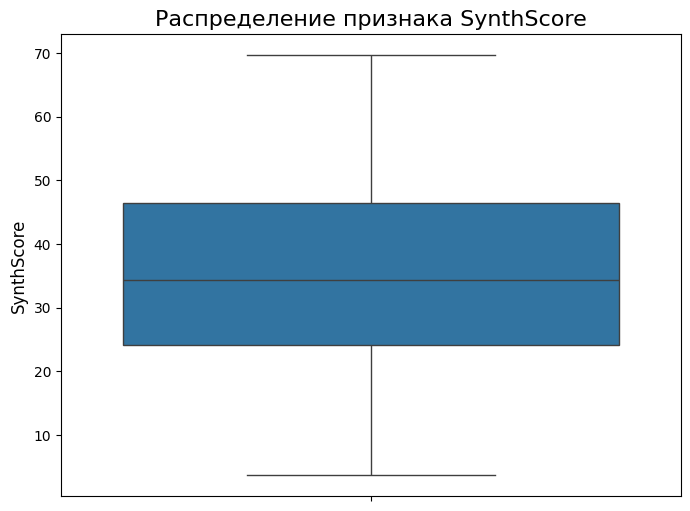

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["SynthScore"])
plt.title('Распределение признака SynthScore', fontsize=16)
plt.ylabel('SynthScore', fontsize=12)
plt.show()

# Молекулы с низкой синтетической сложностью

In [14]:
df[df["SynthScore"]<10]

,Structure No,Brutto-formula,Molecular weight,Product Name,Short Description for web display,CAS,Stock amount,Pathway,Target,IDNUMBER,PRICE,SMILE,InChI,InChI_Key,Type of molecule,Alias,Monoisotopic Mass,Monoisotopic Mass 2,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Polar Surface Area,Druglikeness,Molecular Complexity,Metal-Atoms,Stereo Centers,Rotatable Bonds,Largest Ring Size,Small Rings,Aromatic Rings,Electronegative Atoms,sp3-Carbon Fraction,Largest Ring Size 2,Small Rings 2,Aromatic Rings 2,SynthScore
248,44262.0,C16H14O7,318.28,Lecanoric acid,Lecanoric acid shows ...,480-56-8,4.0,PI3K/Akt/mTOR signali...,P450|||GSK-3,CE06-6291,5 mg - 979,Cc1cc(O)cc(O)c1C(Oc1c...,InChI=1S/C16H14O7/c1-...,HEMSJKZDHNSSEW-UHFFFA...,,,318.074,318.074,2.2259,-2.899,7.0,4.0,228.44,124.29,-1.5188,0.7232,0.0,0.0,4.0,6.0,2.0,2.0,7.0,0.125,6.0,2.0,2.0,3.6842


In [23]:
df[df["SynthScore"]<10]["SMILE"].iloc[0]

'Cc1cc(O)cc(O)c1C(Oc1cc(O)c(C(O)=O)c(C)c1)=O'

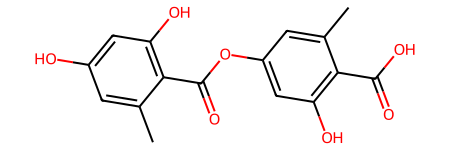

In [22]:
Chem.MolFromSmiles(df[df["SynthScore"]<10]["SMILE"].iloc[0])

Cc1cc(OC(=O)c2c(C)cc(O)cc2O)cc(O)c1C(=O)O -> SynthScore: 3.68 | Путь найден ✔️ | Шагов: 1, Билдинг-блоки: 2/2

IMC (Score: 1.4 -> Вклад 60%: 0.8): MolecularComplexity: 0.7, Rotatable Bonds: 4.0, sp3-Carbon Fraction: 0.1, Aromatic Rings: 2.0

RBS (Score: 7.1 -> Вклад 40%: 2.8): Steps: 10%, , StockDiff: 0.00, , StateDiff: 0.01


* Низкое значение метрики классифицирует данную молекулу как тривиальную для синтеза. Оценка сформирована совокупностью двух факторов: Синтетическая доступность (RBS): Алгоритм ретросинтеза обнаружил прямой маршрут всего в 1 стадию. Оба необходимых для реакции прекурсора (2 из 2) найдены в базе коммерчески доступных соединений (сток). Это означает, что синтез не требует многостадийной подготовки исходных веществ, а сводится к одной реакции объединения готовых «билдинг-блоков».
* Структурная простота (IMC): Молекула обладает низкой внутренней сложностью. Основу структуры составляют два ароматических кольца, которые, согласно весам модели, вносят понижающий коэффициент (как стабильные и предсказуемые фрагменты). Низкая доля  𝑠𝑝3-углеродов и отсутствие стереоцентров указывают на плоскую геометрию без стереохимических затруднений.

* **Вывод:** Молекула является продуктом простой конденсации двух доступных реагентов и не представляет синтетического вызова.


# Молекулы с высокой синтетической сложностью

In [10]:
df[df["SynthScore"]>68]

,Structure No,Brutto-formula,Molecular weight,Product Name,Short Description for web display,CAS,Stock amount,Pathway,Target,IDNUMBER,PRICE,SMILE,InChI,InChI_Key,Type of molecule,Alias,Monoisotopic Mass,Monoisotopic Mass 2,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Polar Surface Area,Druglikeness,Molecular Complexity,Metal-Atoms,Stereo Centers,Rotatable Bonds,Largest Ring Size,Small Rings,Aromatic Rings,Electronegative Atoms,sp3-Carbon Fraction,Largest Ring Size 2,Small Rings 2,Aromatic Rings 2,SynthScore
80,44129.0,C30H36O10,556.61,Interiotherin C,Interiotherin C may b...,460090-65-7,5.0,Others,Others,CE06-6151,5 mg - 670,C[C@H]([C@H](C)[C@H](...,InChI=1S/C30H36O10/c1...,HIGLJZHMTBHEQS-JZEXYR...,,,556.2309,556.2309,5.1294,-6.057,10.0,0.0,420.33,107.98,-3.7050,,0.0,4.0,9.0,8.0,3.0,2.0,10.0,0.4667,8.0,3.0,2.0,68.2458
475,19709.0,C34H38Cl2N4O6,669.60,Hematoporphyrin dihyd...,Hematoporphyrin dihyd...,17696-69-4,5230.1,Others|||Metabolism||...,Others|||Endogenous M...,CE03-6460,"50 mg - 39, 100 mg - ...",CC(C1=C(C)/C2=C/C(C(C...,InChI=1S/C34H36N4O6.2...,CHKBQXNLYLTGHK-UHFFFA...,Approved/Clinical,Hematoporphyrin IX di...,596.2635,596.2635,2.9850,-4.838,10.0,4.0,442.90,164.50,-0.5683,,0.0,2.0,8.0,16.0,4.0,0.0,10.0,0.3529,16.0,4.0,0.0,68.5129
492,3717.0,C26H30ClN9S,536.10,R916562,R916562 is an orally ...,1037798-41-6,100.0,Tyrosine Kinase/Adaptors,TAM Receptor,CE01-5944,"25 mg - 1520, 50 mg -...",Cc(c1n2)csc1c(-n1nc(N...,InChI=1S/C26H30ClN9S/...,HLRDOMFIYHUBLJ-SQGPQF...,,,535.2033,535.2033,5.5646,-5.333,9.0,2.0,382.90,129.26,6.4630,,0.0,3.0,5.0,6.0,8.0,4.0,11.0,0.4615,6.0,8.0,4.0,69.6782


SMILES: C[C@H]([C@H](C)[C@H](c(cc1OC)c(-c(c2cc3c4OCO3)c4OC)c(OC)c1OC)OC(/C(/C)=C\C)=O)[C@H]2OC(C)=O


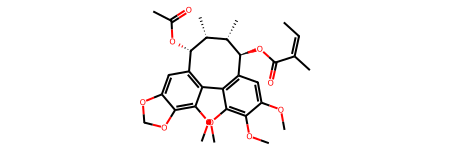

SMILES: CC(C1=C(C)/C2=C/C(C(C)=C3CCC(O)=O)=N/C3=C\C(C(CCC(O)=O)=C3C)=N/C3=C\C(C(C(C)O)=C3C)=N/C3=C\C1=N2)O.Cl.Cl


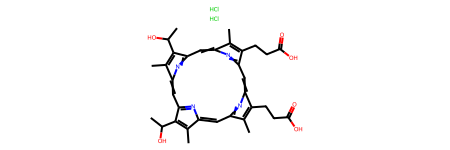

SMILES: Cc(c1n2)csc1c(-n1nc(Nc(cc3)ccc3N(CC3)CCN3[C@H]3[C@H](CC4)C[C@H]4C3)nc1N)nc2Cl


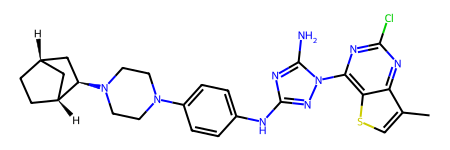

In [32]:
smiles_list = df[df["SynthScore"] > 68]["SMILE"].tolist()
for sml in smiles_list:
    print(f"SMILES: {sml}")
    molecule = Chem.MolFromSmiles(sml)
    display(molecule)

> 1 пример

C/C=C(/C)C(=O)O[C@H]1c2cc(OC)c(OC)c(OC)c2-c2c(cc3c(c2OC)OCO3)[C@H](OC(C)=O)[C@H](C)[C@@H]1C -> SynthScore: 68.25 | Путь найден ✔️ | Шагов: 6, Билдинг-блоки: 3/5

IMC (Score: 73.8 -> Вклад 60%: 44.3): MolecularComplexity: 1345.0, Stereo Centers: 4.0, Rotatable Bonds: 9.0, sp3-Carbon Fraction: 0.5, Aromatic Rings: 2.0

RBS (Score: 59.9 -> Вклад 40%: 24.0): Steps: 60%, , StockDiff: 0.40, , StateDiff: 0.99

* Высокая оценка сложности обусловлена доминированием структурного фактора (IMC). Молекула содержит 4 стереоцентра и высокую долю 𝑠𝑝3-углеродов, что указывает на сложную трехмерную архитектуру, требующую стереоселективных методов синтеза. Синтетический маршрут также затруднен: несмотря на среднюю длину (6 стадий), доступность прекурсоров низкая (3 из 5), что требует предварительного синтеза недостающих компонентов. Высокая неуверенность модели (StateDiff 0.99) дополнительно повышает итоговый риск.

> 2 пример

CC1=C(CCC(=O)O)/C2=C/C3=N/C(=C\C4=N/C(=C\C5=N/C(=C\C1=N2)C(C)=C5C(C)O)C(C)=C4C(C)O)C(C)=C3CCC(=O)O -> SynthScore: 68.51 | Путь найден ✔️ | Шагов: 8, Билдинг-блоки: 3/4

IMC (Score: 66.9 -> Вклад 60%: 40.2): MolecularComplexity: 1777.5, Stereo Centers: 2.0, Rotatable Bonds: 8.0, sp3-Carbon Fraction: 0.4

RBS (Score: 70.9 -> Вклад 40%: 28.4): Steps: 80%, , StockDiff: 0.25, , StateDiff: 0.99


* Сложность данной молекулы формируется комбинацией макроциклической структуры и длинного маршрута синтеза. Показатель молекулярной сложности экстремально высок (>1700), что характерно для громоздких сопряженных систем. Найденный путь синтеза включает 8 стадий, что приближается к установленному лимиту эффективности. Ситуация усугубляется отсутствием одного из ключевых билдинг-блоков в стоке (3 из 4), что вынуждает химика синтезировать этот фрагмент «с нуля».


> 3 пример

Cc1csc2c(-n3nc(Nc4ccc(N5CCN([C@@H]6C[C@H]7CC[C@@H]6C7)CC5)cc4)nc3N)nc(Cl)nc12 -> SynthScore: 69.68 | Путь найден ✔️ | Шагов: 11, Билдинг-блоки: 5/6

IMC (Score: 60.6 -> Вклад 60%: 36.4): MolecularComplexity: 1440.5, Stereo Centers: 3.0, Rotatable Bonds: 5.0, sp3-Carbon Fraction: 0.5, Aromatic Rings: 4.0

RBS (Score: 83.2 -> Вклад 40%: 33.3): Steps: 100%, , StockDiff: 0.17, , StateDiff: 0.99


* Критическим фактором здесь выступает экстремальная длина синтетического пути (RBS). Алгоритм предложил маршрут из 11 стадий, что превышает оптимальные значения для промышленного или лабораторного синтеза, давая максимальный вклад в сложность по шкале Steps (100%). Структурная сложность также значительна за счет наличия мостиковой бициклической системы с тремя стереоцентрами, привитой к гетероциклическому ядру. Даже высокое наличие реагентов (5/6) не компенсирует трудозатраты на проведение 11 последовательных реакций.


# Молекулы без найденного пути

> Молекулы без найденного пути отсутствуют.